# Copyright

<PRE>
Jelen Jupyter notebook a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott "Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült.
A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A notebook bármely részének újra felhasználása, publikálása csak a szerzők írásos beleegyezése esetén megegengedett.

2021 (c) Gyires-Tóth Bálint (toth.b kukac tmit pont bme pont hu), Zainkó Csaba (zainko kukac tmit pont bme pont hu), Kalapos András
</PRE>

# MNIST adatbázis tanítása MLP-vel

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Ezt követően töltsük be az MNIST adatbázist:

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(X_train.min(), X_train.max())
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(60000, 28, 28)
(10000, 28, 28)
0 255
(60000,)
(10000,)
5


In [4]:
# Print and try to interpret X_train[0]
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print(np.ceil(X_train[0]/255).astype(int))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 

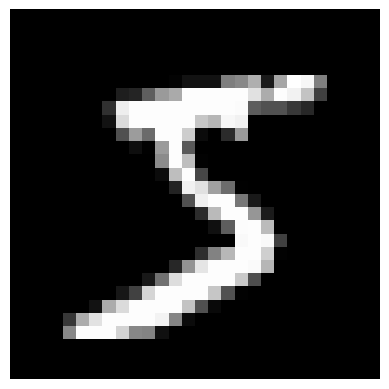

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [7]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# [0, 255] tartományba eső pixel értékek átskálázása [0, 1] intervallumba
X_train /= 255
X_test /= 255

nb_classes = 10

# a kimenetet onehot kódolásúvá alakítjuk
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(np.asarray(range(nb_classes)))
print(Y_train[0].astype(np.int))


(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0 0]


<ipython-input-8-b59b33ee9e5e>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(Y_train[0].astype(np.int))


Hozzuk létre a hálózatot:

In [9]:
nb_classes = 10

# Háló definiálása
model = Sequential()
model.add(Dense(units=256, input_shape=(784,), activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

Majd tanítsuk be a modellünket. Most nem határoztunk meg külön validációs adatbázist, hanem a model.fit függvény validation_split paramétereként adjuk meg, hogy hány százalékot használjon fel validációs célokra a tanítás:

In [10]:
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir='logs', histogram_freq=1, write_graph=1)

In [11]:
network_history = model.fit(X_train, Y_train, batch_size=128,
                            epochs=30, verbose=1, validation_split=0.2, callbacks=[tb])

Epoch 1/30
375/375 [==============================] - 8s 10ms/step - loss: 1.3556 - accuracy: 0.6807 - val_loss: 0.6516 - val_accuracy: 0.8609
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 0.5364 - accuracy: 0.8672 - val_loss: 0.4135 - val_accuracy: 0.8923
Epoch 3/30
375/375 [==============================] - 3s 9ms/step - loss: 0.4059 - accuracy: 0.8905 - val_loss: 0.3492 - val_accuracy: 0.9029
Epoch 4/30
375/375 [==============================] - 3s 9ms/step - loss: 0.3545 - accuracy: 0.9016 - val_loss: 0.3169 - val_accuracy: 0.9100
Epoch 5/30
375/375 [==============================] - 3s 9ms/step - loss: 0.3241 - accuracy: 0.9086 - val_loss: 0.2938 - val_accuracy: 0.9162
Epoch 6/30
375/375 [==============================] - 2s 6ms/step - loss: 0.3020 - accuracy: 0.9136 - val_loss: 0.2776 - val_accuracy: 0.9214
Epoch 7/30
375/375 [==============================] - 2s 6ms/step - loss: 0.2848 - accuracy: 0.9180 - val_loss: 0.2649 - val_accuracy: 0.9259
Epoch

Ezután jelenítsük meg, a tanítás során a hibát és a pontosságot a tanító és validációs adatokon:

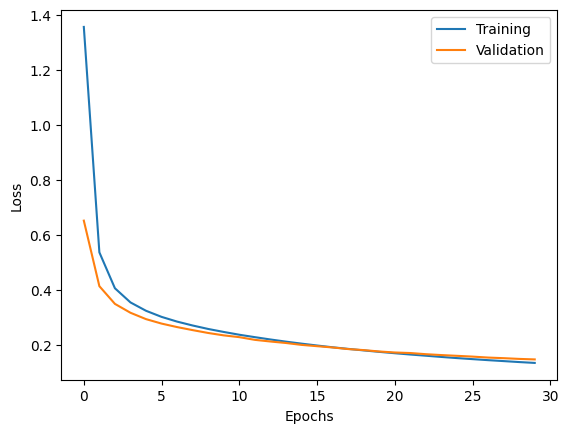

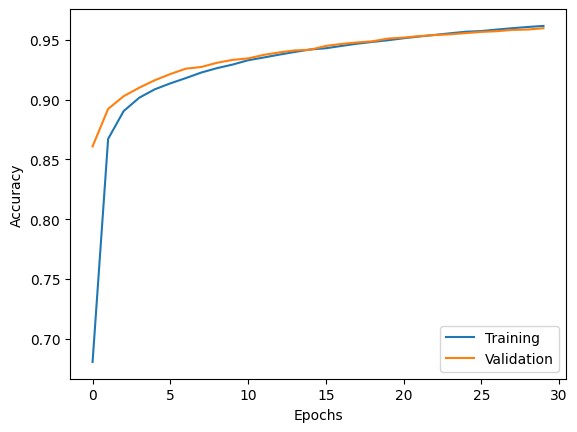

In [12]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

Vizsgáljuk meg a TensorBoard logokat is:

In [13]:
%load_ext tensorboard

In [14]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

# Hálózat vizsgálata

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
print('Bemenet: ', model.input)

Bemenet:  KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")


In [17]:
print('Rétegek:\n')
for layer in model.layers:
    print("Réteg neve: ", layer.name, ', tanítható: ', layer.trainable)
    print(layer.get_config(),'\n')

Rétegek:

Réteg neve:  dense , tanítható:  True
{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 784), 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} 

Réteg neve:  dense_1 , tanítható:  True
{'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_

In [18]:
print('Kimenet: ', model.output)

Kimenet:  KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")


(-0.5, 1822.5, 884.5, -0.5)

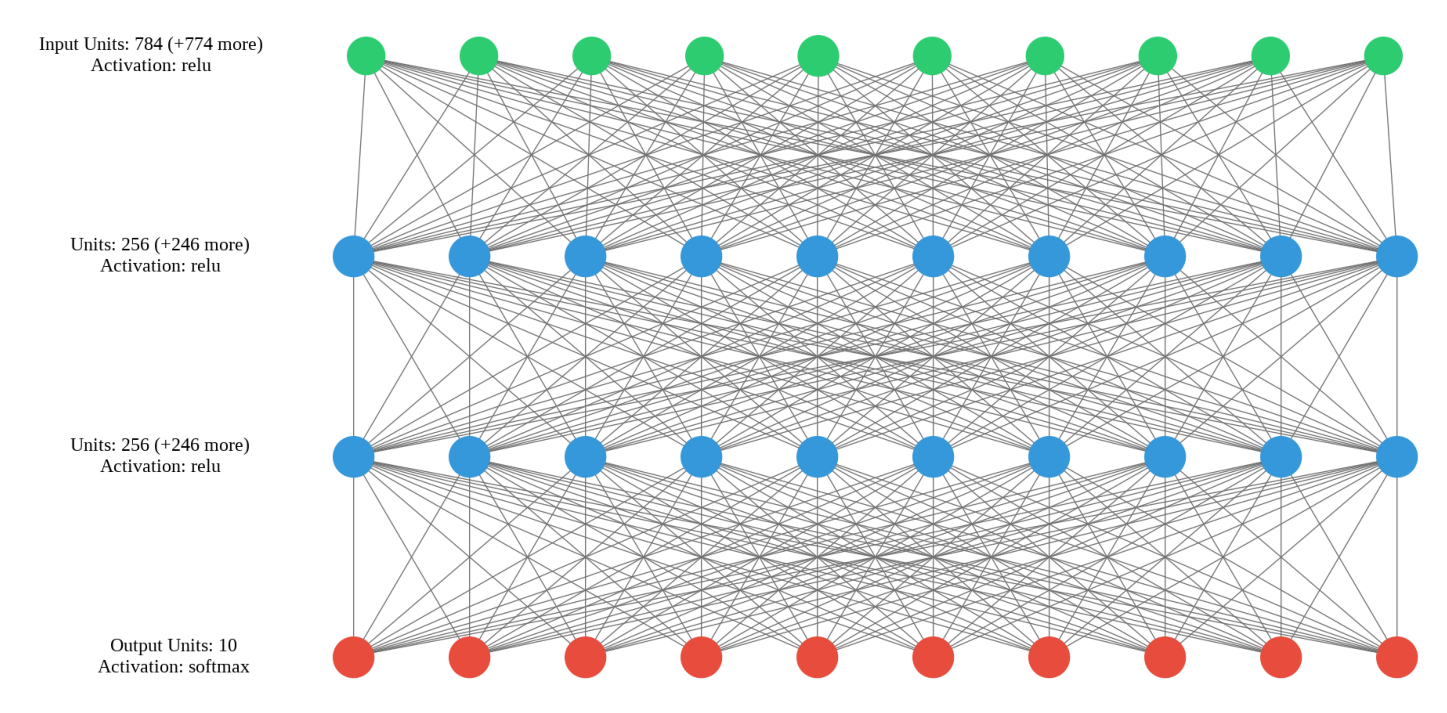

In [19]:
# keras-vizualizer segítségével láthatjuk az hálót képformátumba
!pip3 install keras-visualizer
from keras_visualizer import visualizer
import matplotlib.image as mpimg
visualizer(model, file_format='png', view=True)
img = mpimg.imread('graph.png')
fig = plt.figure(figsize=[20,9])
plt.imshow(img)
plt.axis('off')

# Predikció és tévesztési mátrix

In [20]:
preds=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
print(preds.shape)

(10000, 10)


In [22]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,np.argmax(preds,axis=1))

#https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

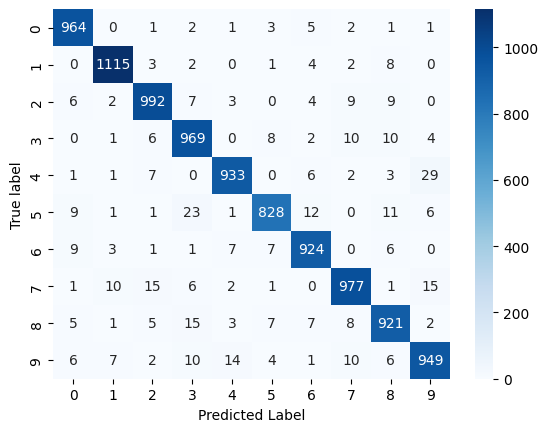

In [23]:
import seaborn as sns; #sns.set()
ax = sns.heatmap(conf, annot=True, fmt='d', cmap=plt.cm.Blues)
ax.set(xlabel='Predicted Label',
       ylabel='True label');

# Képek feltöltése Tensorboardba

In [24]:
import tensorflow as tf
logdir = "logs/images/"
file_writer = tf.summary.create_file_writer(logdir + "/mnist")
# Test névtérbe rakjuk a képeket
with tf.name_scope("Test") as scope:
  with file_writer.as_default():
    #Az első három tesztképet töltjük fel
    img = np.reshape(X_test[0:3], (-1, 28, 28, 1))
    tf.summary.image("MNIST Image 3", img, step=0,max_outputs=3,description="Info")

*Ajánlott forrás (inkább, de nem kizárólag haladóknak): Osztályozó hálók kimenetei valószínűségek? https://jtuckerk.github.io/prediction_probabilities.html*
![](https://jtuckerk.github.io/prediction_probabilities/images/correct_ratio.png)
